<a href="https://colab.research.google.com/github/luizfelip3/luizfelip3/blob/main/Dados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np

import IPython.display as display
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

In [5]:
dadosBrutos = pd.read_csv('/content/MICRODADOS_ENEM_2021.csv',
                          encoding='latin-1',
                          sep=';')

In [6]:
dadosBrutos.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [10]:
dadosBrutos.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [12]:
dados_selecionados = dadosBrutos.filter(items=['TP_FAIXA_ETARIA','TP_SEXO','TP_ESCOLA','TP_LOCALIZACAO_ESC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA','Q006','Q024','Q025'])

In [20]:
dados_selecionados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESCOLA,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,Q006,Q024,Q025
0,5,F,1,NaN,NaN,574.6,472.6,NaN,1.0,D,B,B
1,12,M,1,NaN,505.9,551.8,498.3,461.5,1.0,B,A,A
2,13,F,1,NaN,NaN,NaN,NaN,NaN,1.0,C,B,B
3,3,M,2,1.0,580.7,678.9,638.9,659.5,0.0,B,B,B
4,2,F,2,1.0,497.7,532.4,457.6,582.6,1.0,C,B,B


In [21]:
dados_selecionados.shape

(74116, 12)

In [121]:
dados_selecionados.isnull().sum()

TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_ESCOLA                 0
TP_LOCALIZACAO_ESC    54032
NU_NOTA_CN            15969
NU_NOTA_CH            13643
NU_NOTA_LC            13643
NU_NOTA_MT            15969
TP_LINGUA                 1
Q006                      1
Q024                      1
Q025                      1
dtype: int64

In [123]:
dados_selecionados.isna().mean()

TP_FAIXA_ETARIA       0.000000
TP_SEXO               0.000000
TP_ESCOLA             0.000000
TP_LOCALIZACAO_ESC    0.729019
NU_NOTA_CN            0.215460
NU_NOTA_CH            0.184076
NU_NOTA_LC            0.184076
NU_NOTA_MT            0.215460
TP_LINGUA             0.000013
Q006                  0.000013
Q024                  0.000013
Q025                  0.000013
dtype: float64

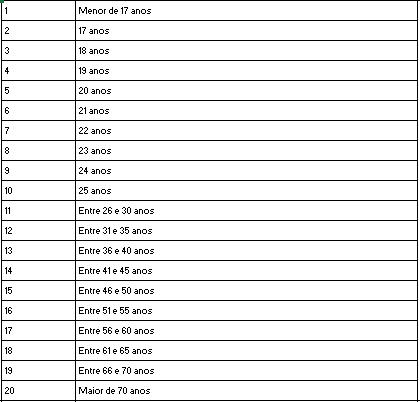

In [35]:
# FAIXA ETARIA
display.display(Image.open('/content/faixaEtariaEnem.png'))

In [17]:
dadosFaixaEtaria = dados_selecionados['TP_FAIXA_ETARIA']

In [19]:
dadosFaixaEtaria.value_counts().sort_index()

1      4128
2     16963
3     20026
4      9774
5      5607
6      3494
7      2240
8      1606
9      1327
10     1046
11     3265
12     1741
13     1267
14      745
15      441
16      257
17      129
18       40
19       14
20        6
Name: TP_FAIXA_ETARIA, dtype: int64

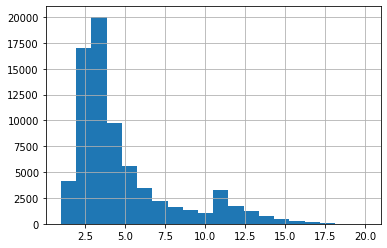

In [39]:
dadosFaixaEtaria.hist(bins=20);

In [40]:
# Obtendo o sexo
coluna_sexo = dados_selecionados['TP_SEXO']

In [42]:
coluna_sexo.value_counts()

F    51928
M    22188
Name: TP_SEXO, dtype: int64

In [43]:
# Obtendo as pessoas que tem internet em casa
coluna_tem_internet = dados_selecionados['Q025']

In [44]:
# B = sim / A = não
coluna_tem_internet.value_counts()

B    66253
A     7862
Name: Q025, dtype: int64

In [45]:
# Obtendo as pessoas que tem Computador em casa
coluna_tem_pc = dados_selecionados['Q024']

In [47]:
# A = Não
# B = Sim, um.
# C = Sim, dois.
# D = Sim, três.
# E = Sim, quatro.
coluna_tem_pc.value_counts()

A    35482
B    28864
C     6411
D     2288
E     1070
Name: Q024, dtype: int64

In [74]:
# Obtendo as notas de matemática
dados_notas_mat = dados_selecionados['NU_NOTA_MT']
# Ordenando da menor nota para a maior
dados_notas_mat.value_counts().sort_index()

0.0      8
334.1    1
347.6    1
352.7    1
353.8    7
        ..
929.1    2
930.4    1
944.1    6
948.8    3
953.1    4
Name: NU_NOTA_MT, Length: 5022, dtype: int64

In [75]:
# Média das notas de matemática
dados_notas_mat.mean()

535.8677902557312

In [76]:
dados_notas_mat.describe()

count    58147.000000
mean       535.867790
std        112.700913
min          0.000000
25%        443.900000
50%        513.300000
75%        614.700000
max        953.100000
Name: NU_NOTA_MT, dtype: float64

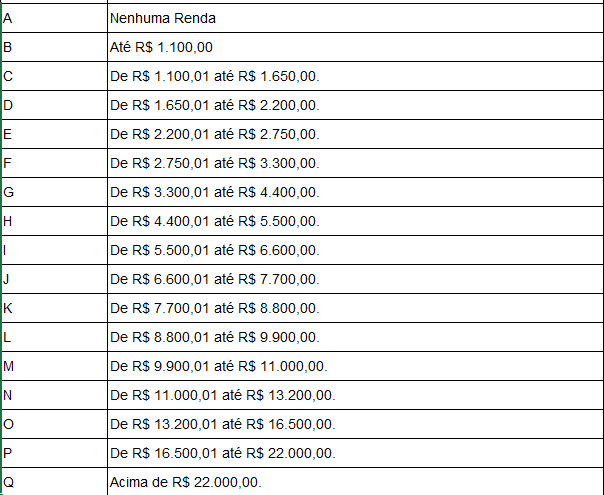

In [77]:
# Renda ENEM
display.display(Image.open('/content/rendaEnem.png'))

In [78]:
renda_enem = dados_selecionados['Q006']

In [79]:
renda_enem.value_counts().sort_index()

A     5502
B    24986
C    13610
D     9109
E     4047
F     4417
G     3345
H     2401
I     1458
J      893
K      689
L      546
M      794
N      526
O      592
P      524
Q      676
Name: Q006, dtype: int64

In [87]:
notas_maior_750_mat = (dados_selecionados['NU_NOTA_MT'] > 750)

In [92]:
notas_maior_750_mat.value_counts().sort_index()

False    71411
True      2705
Name: NU_NOTA_MT, dtype: int64

In [93]:
# Tivemos 2705 pessoas que tiraram a nota maior que 750 em Matemática no ENEM

In [101]:
notas_maior_750_cn = (dados_selecionados['NU_NOTA_CN'] > 750)

In [102]:
notas_maior_750_cn.value_counts().sort_index()

False    73998
True       118
Name: NU_NOTA_CN, dtype: int64

In [ ]:
# Tivemos 118 pessoas que tiraram a nota maior que 750 em Ciencias da Natureza no ENEM

In [103]:
notas_maior_750_ch = (dados_selecionados['NU_NOTA_CH'] > 750)

In [104]:
notas_maior_750_ch.value_counts().sort_index()

False    73775
True       341
Name: NU_NOTA_CH, dtype: int64

In [ ]:
# Tivemos 341 pessoas que tiraram a nota maior que 750 em Ciencias Humanas no ENEM

In [105]:
notas_maior_750_lc = (dados_selecionados['NU_NOTA_LC'] > 750)

In [106]:
notas_maior_750_lc.value_counts().sort_index()

False    74102
True        14
Name: NU_NOTA_LC, dtype: int64

In [ ]:
# Tivemos apenas 14 pessoas que tiraram a nota maior que 750 em Linguagens e Códigos no ENEM

In [108]:
notas_igual_a_zero_mat = (dados_selecionados['NU_NOTA_MT'] == 0)

In [110]:
notas_igual_a_zero_mat.value_counts().sort_index()

False    74108
True         8
Name: NU_NOTA_MT, dtype: int64

In [ ]:
# 8 pessoas zeraram em matemática

In [111]:
notas_igual_a_zero_cn = (dados_selecionados['NU_NOTA_CN'] == 0)

In [112]:
notas_igual_a_zero_cn.value_counts().sort_index()

False    74104
True        12
Name: NU_NOTA_CN, dtype: int64

In [ ]:
# 12 pessoas zeraram em Ciencias da Natureza

In [ ]:
notas_igual_a_zero_ch = (dados_selecionados['NU_NOTA_CH'] == 0)

In [115]:
notas_igual_a_zero_ch.value_counts().sort_index()

False    74033
True        83
Name: NU_NOTA_CH, dtype: int64

In [ ]:
# 83 pessoas zeraram em Ciencias Humanas

In [116]:
notas_igual_a_zero_lc = (dados_selecionados['NU_NOTA_LC'] == 0)

In [117]:
notas_igual_a_zero_lc.value_counts().sort_index()

False    74079
True        37
Name: NU_NOTA_LC, dtype: int64

In [ ]:
# 37 pessoas zeraram em Linguagens e Códigos